In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Metal device set to: Apple M1


2022-12-09 13:30:59.849068: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-09 13:30:59.849357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


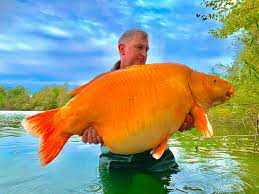

In [5]:
Image.open('gf1.jpg')

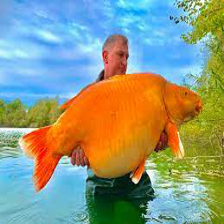

In [6]:
gf = Image.open('gf1.jpg').resize(IMAGE_SHAPE)
gf

In [7]:
goldfish = np.array(gf)/255
goldfish.shape

(224, 224, 3)

In [8]:
goldfish

array([[[0.42745098, 0.62352941, 0.81568627],
        [0.42745098, 0.62352941, 0.81568627],
        [0.43137255, 0.62745098, 0.82352941],
        ...,
        [0.65098039, 0.59215686, 0.02745098],
        [0.76862745, 0.63529412, 0.03137255],
        [0.82352941, 0.70196078, 0.09803922]],

       [[0.43921569, 0.62745098, 0.81960784],
        [0.43529412, 0.62745098, 0.81960784],
        [0.43137255, 0.62745098, 0.82352941],
        ...,
        [0.65490196, 0.61568627, 0.10196078],
        [0.70980392, 0.61176471, 0.08235294],
        [0.68627451, 0.59607843, 0.06666667]],

       [[0.43921569, 0.62745098, 0.81960784],
        [0.43921569, 0.63137255, 0.82352941],
        [0.43921569, 0.62745098, 0.82745098],
        ...,
        [0.64705882, 0.64313725, 0.15686275],
        [0.61568627, 0.57254902, 0.09019608],
        [0.56470588, 0.5254902 , 0.04313725]],

       ...,

       [[0.50588235, 0.75294118, 0.80784314],
        [0.50196078, 0.74901961, 0.80392157],
        [0.49803922, 0

WE ARE ADDING A NEW DIMENSION TO THE ARRAY

In [9]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
result = classifier.predict(goldfish[np.newaxis, ...])

2022-12-09 13:40:03.910146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-09 13:40:04.009311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


In [11]:
result.shape

(1, 1001)

In [12]:
result

array([[ 0.33557907,  6.657208  ,  7.3424854 , ..., -0.02311959,
         1.2431335 , -0.04546899]], dtype=float32)

In [13]:
predicted_label_index = np.argmax(result)

In [14]:
predicted_label_index

2

In [16]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [17]:
image_labels[predicted_label_index]

'goldfish'

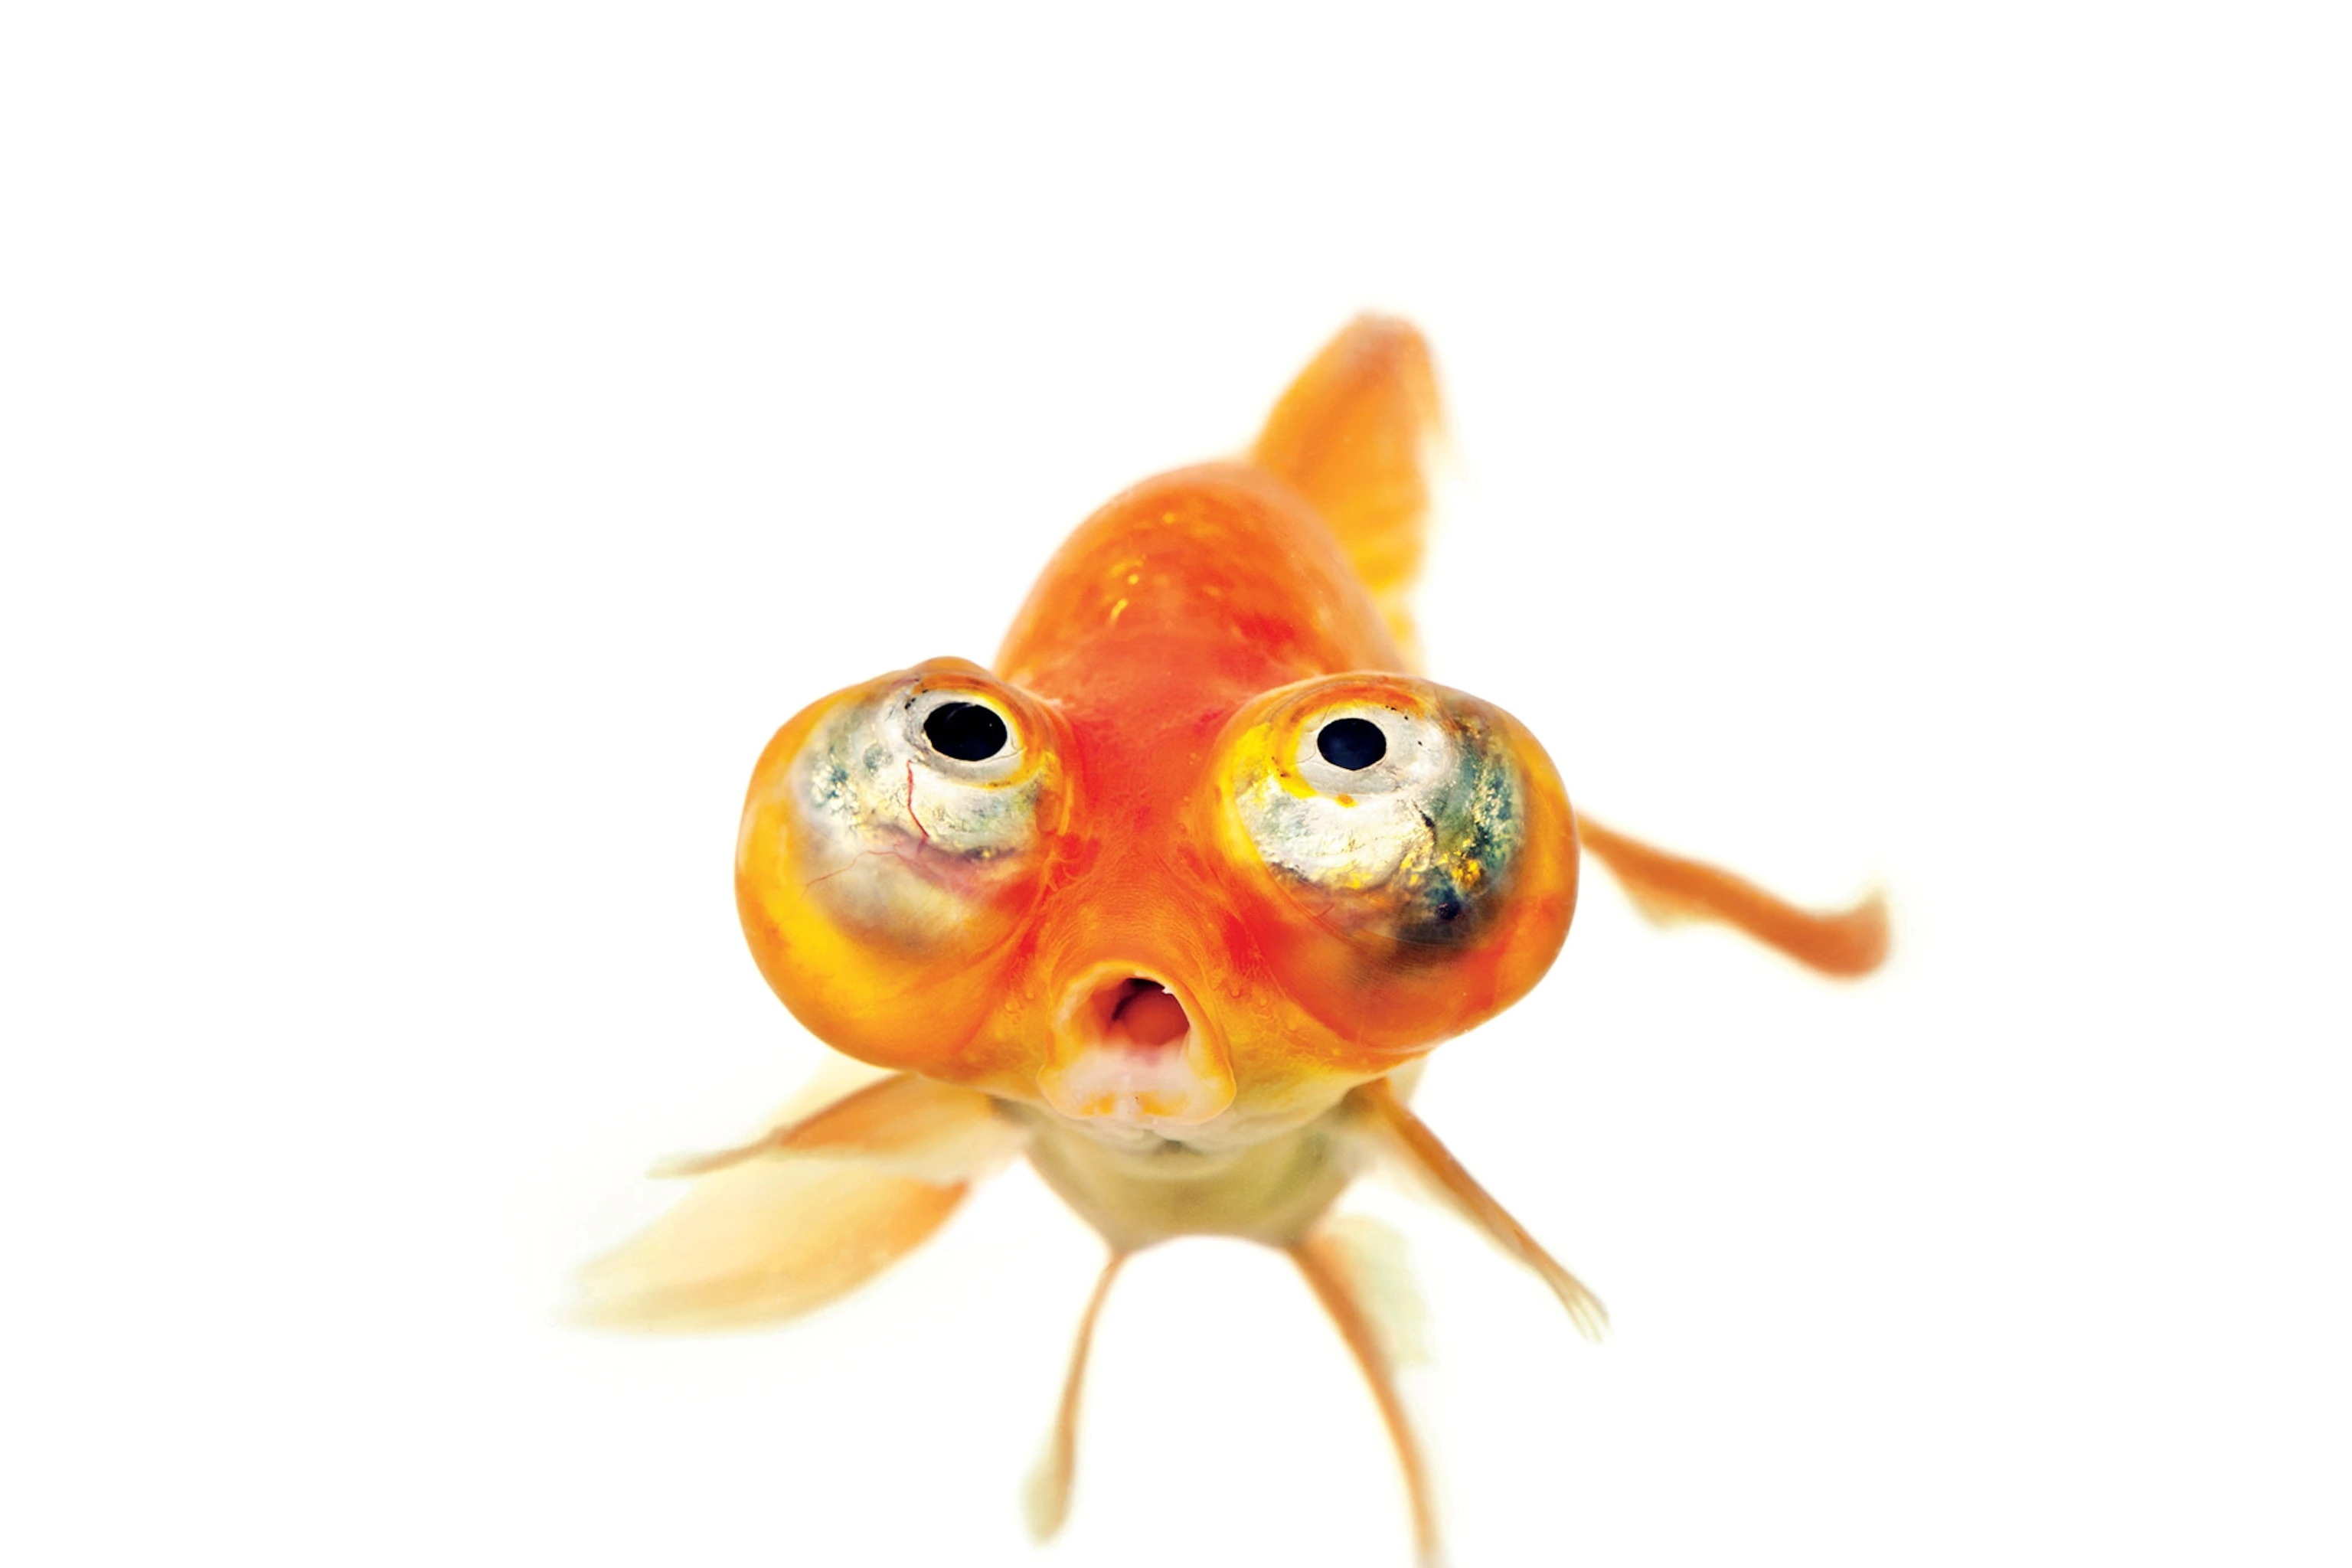

In [18]:
Image.open('gf2.jpg')

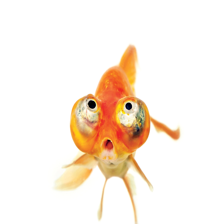

In [20]:
gf = Image.open('gf2.jpg').resize(IMAGE_SHAPE)
gf

In [21]:
goldfish = np.array(gf)/255
goldfish.shape

(224, 224, 3)

In [22]:
goldfish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [23]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [24]:
result = classifier.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 0s 100ms/step


In [25]:
result.shape

(1, 1001)

In [26]:
result

array([[ 0.27705047,  1.64904   ,  9.289277  , ..., -2.1017408 ,
        -0.30135968,  0.2267683 ]], dtype=float32)

In [27]:
predicted_label_index = np.argmax(result)

In [28]:
predicted_label_index

2

In [29]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

In [30]:
image_labels[predicted_label_index]

'goldfish'

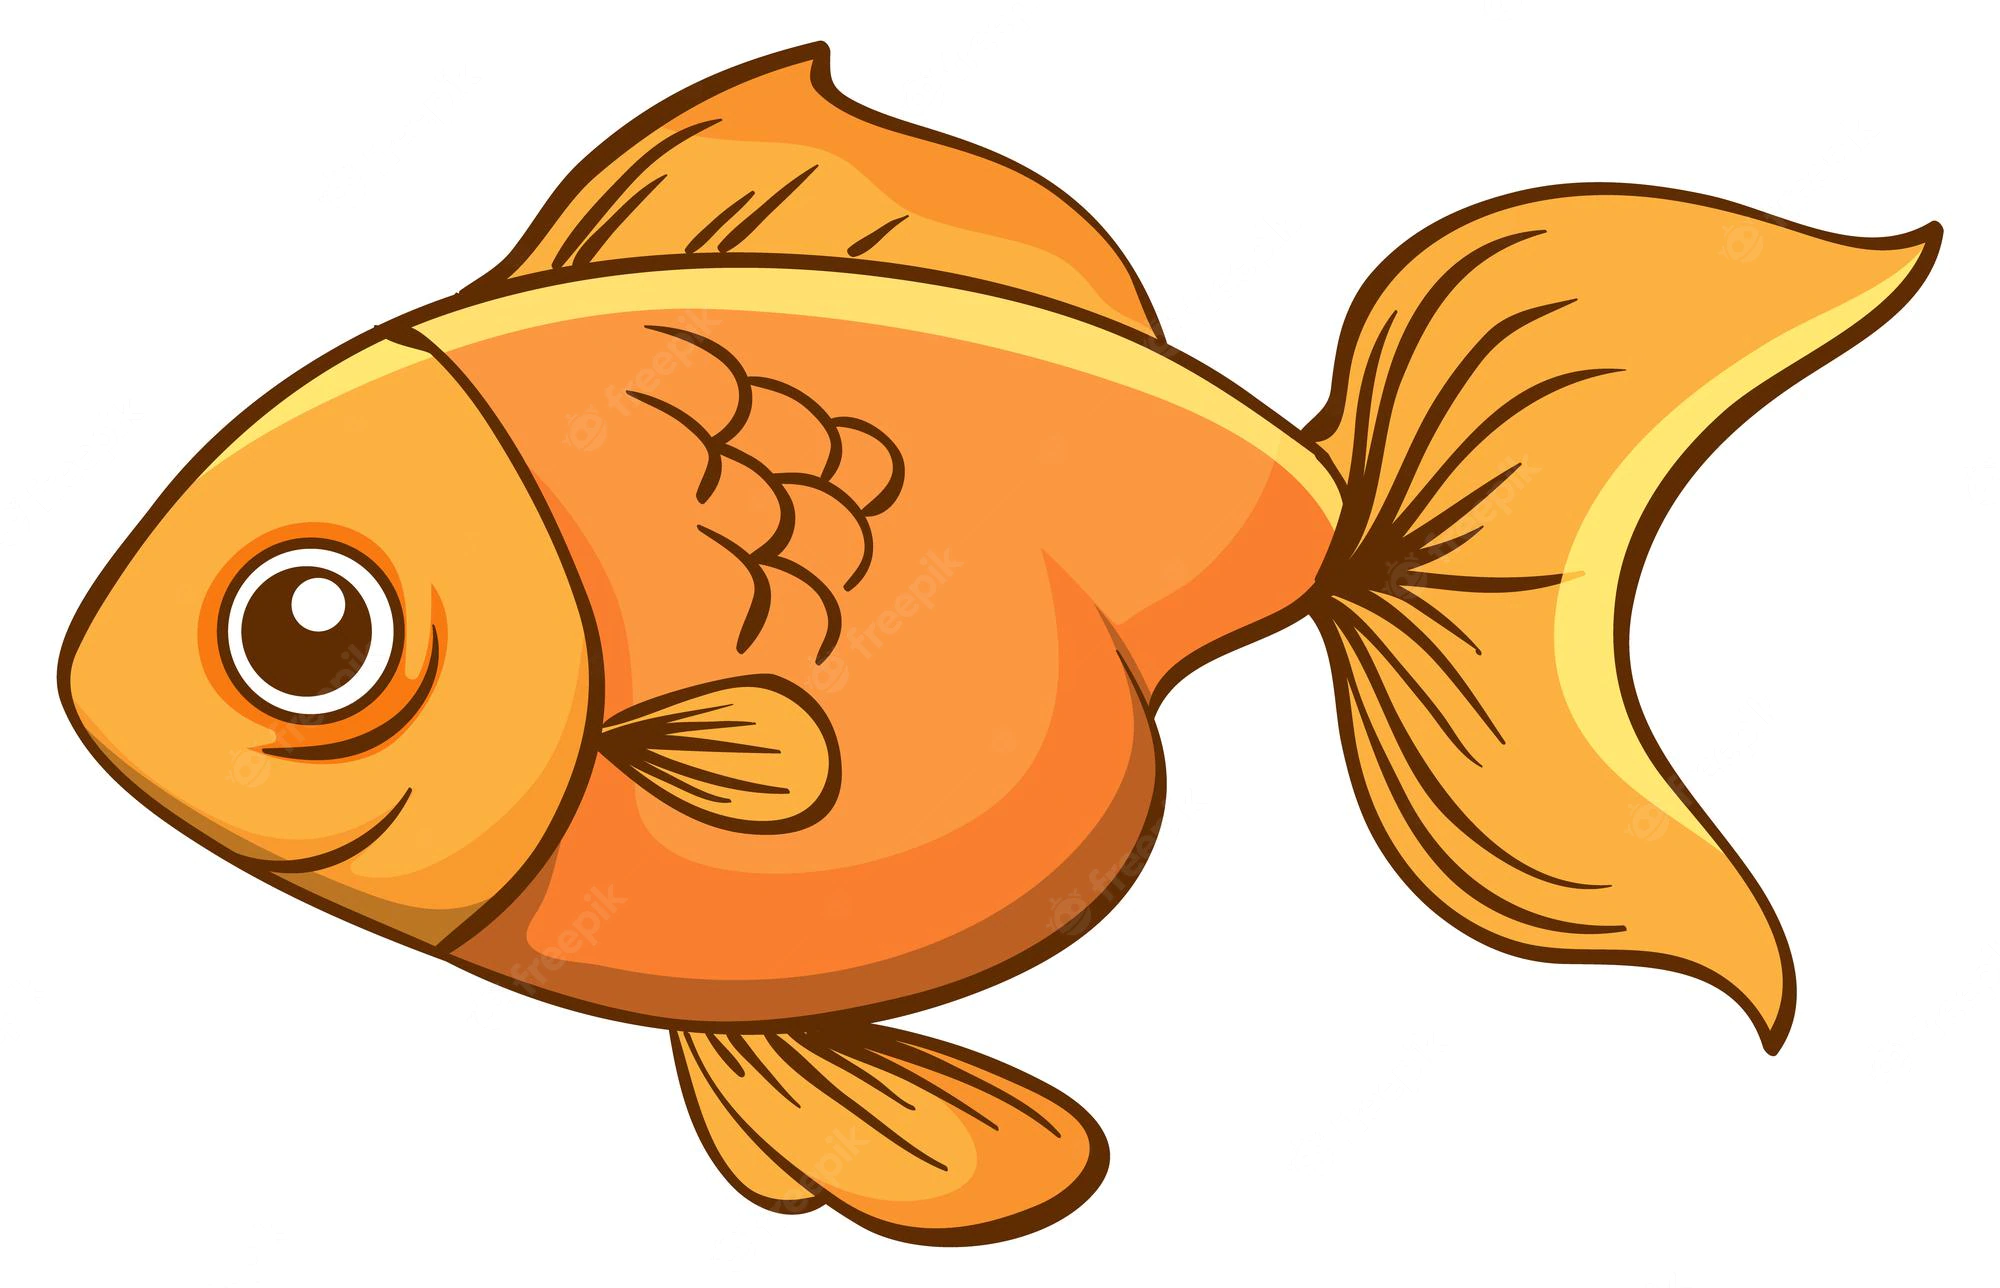

In [32]:
Image.open('gf3.jpg')

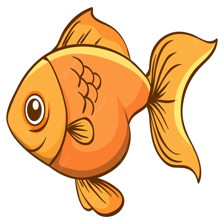

In [34]:
gf = Image.open('gf3.jpg').resize(IMAGE_SHAPE)
gf

In [35]:
goldfish = np.array(gf)/255
goldfish.shape

(224, 224, 3)

In [36]:
goldfish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [37]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [38]:
result = classifier.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 0s 82ms/step


In [39]:
result

array([[ 0.21317479,  0.20252404,  0.39388216, ...,  0.32269984,
        -1.2139094 ,  0.53333426]], dtype=float32)

In [40]:
result.shape

(1, 1001)

In [41]:
predicted_label_index = np.argmax(result)

In [42]:
predicted_label_index

711

In [43]:
image_labels[predicted_label_index]

'pencil sharpener'

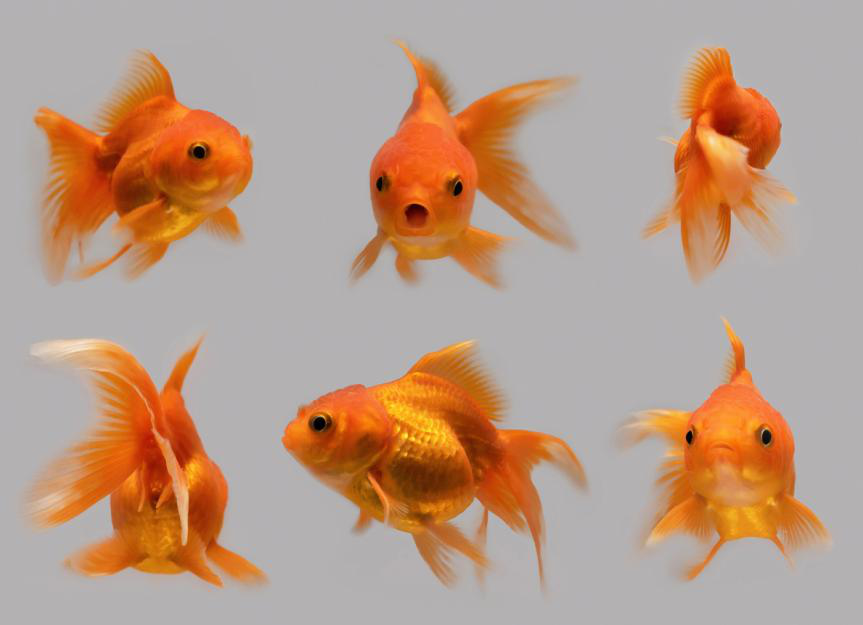

In [44]:
Image.open('gf4.jpg')

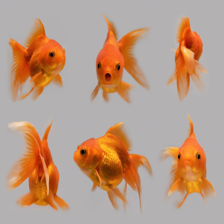

In [46]:
gf = Image.open('gf4.jpg').resize(IMAGE_SHAPE)
gf

In [47]:
goldfish = np.array(gf)/255
goldfish.shape

(224, 224, 3)

In [48]:
goldfish

array([[[0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        ...,
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922]],

       [[0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        ...,
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922]],

       [[0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        [0.70196078, 0.69411765, 0.70588235],
        ...,
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922]],

       ...,

       [[0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0.69411765, 0.69803922],
        [0.70196078, 0

In [49]:
goldfish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [50]:
result = classifier.predict(goldfish[np.newaxis, ...])

1/1 [==============================] - 0s 80ms/step


In [51]:
result

array([[ 0.25343207,  1.4534092 ,  9.889341  , ..., -2.161418  ,
         0.14842582,  0.7026942 ]], dtype=float32)

In [52]:
result.shape

(1, 1001)

In [53]:
predicted_label_index = np.argmax(result)

In [54]:
predicted_label_index

2

In [55]:
image_labels[predicted_label_index]

'goldfish'

### Custom Transfer Learning: Load flowers dataset

In [56]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [57]:
data_dir

'./datasets/flower_photos'

In [58]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [59]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [60]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [61]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

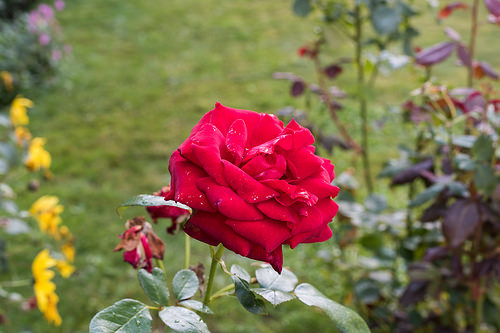

In [64]:
Image.open(str(roses[3]))

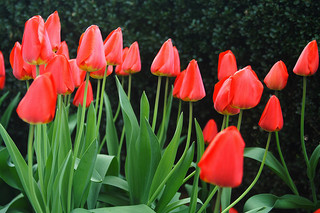

In [70]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[6]))

### Read flowers images from disk into numpy array using opencv

In [71]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [72]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [73]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [78]:
str(flowers_images_dict['roses'][3])

'datasets/flower_photos/roses/15011625580_7974c44bce.jpg'

In [79]:
img = cv2.imread(str(flowers_images_dict['roses'][3]))
img.shape

(333, 500, 3)

In [80]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [81]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [82]:
X = np.array(X)
y = np.array(y)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [84]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [85]:
X[0].shape

(224, 224, 3)

In [86]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [87]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

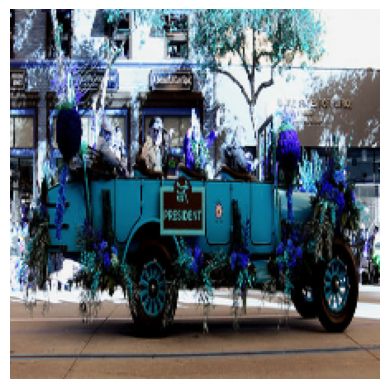

In [88]:
plt.axis('off')
plt.imshow(X[0])

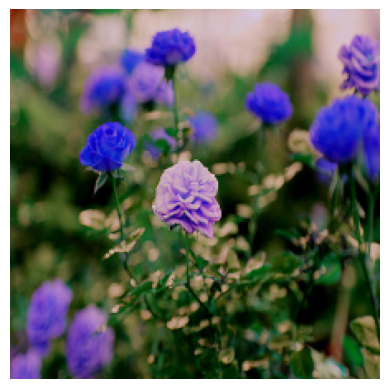

In [89]:
plt.axis('off')
plt.imshow(X[1])

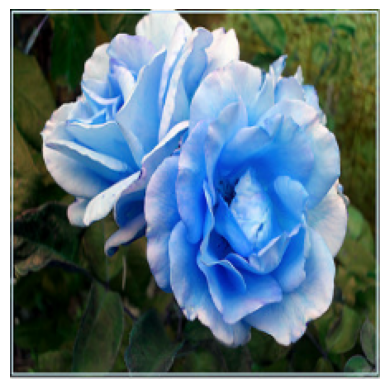

In [90]:
plt.axis('off')
plt.imshow(X[2])

In [91]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

2022-12-09 14:14:15.888865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step


array([795, 795, 722])

In [92]:
image_labels[795]

'shower curtain'

### Now take pre-trained model and retrain it using flowers images

In [93]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [94]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [95]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


2022-12-09 14:15:53.027877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 40s 435ms/step - loss: 0.8423 - acc: 0.6850
Epoch 2/5
86/86 [==============================] - 37s 436ms/step - loss: 0.4131 - acc: 0.8547
Epoch 3/5
86/86 [==============================] - 37s 434ms/step - loss: 0.3211 - acc: 0.8899
Epoch 4/5
86/86 [==============================] - 37s 430ms/step - loss: 0.2639 - acc: 0.9197
Epoch 5/5
86/86 [==============================] - 37s 433ms/step - loss: 0.2272 - acc: 0.9331


In [96]:
model.evaluate(X_test_scaled,y_test)

2022-12-09 14:19:08.884545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 15s 500ms/step - loss: 0.3947 - acc: 0.8682


[0.39474013447761536, 0.8681917190551758]

ValueError: in user code:

    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/shubhamkumar/tensorflow-test/env/lib/python3.8/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [103]:
model.predict(np.array([X_test_scaled[0]]))

2022-12-09 14:27:35.997732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 554ms/step


array([[-5.013898  ,  4.3987827 ,  0.73656845, -1.1417466 , -4.6314487 ]],
      dtype=float32)

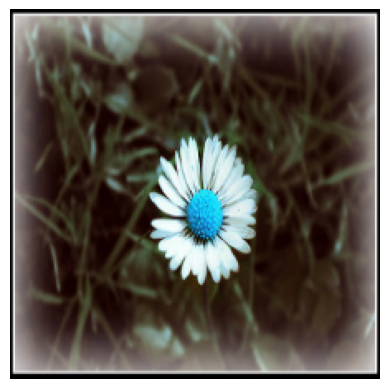

In [104]:
plt.axis('off')
plt.imshow(X_test[0])

In [105]:
y_test[0]

1

In [107]:
pred = model.predict(np.array([X_test_scaled[0]]))
np.argmax(pred)

1/1 [==============================] - 0s 82ms/step


1

MUCH BETTER...